Original shape :  (500, 500, 3)
Resized shape :  (150, 150, 3)
Resized1 shape :  (225, 225, 3)


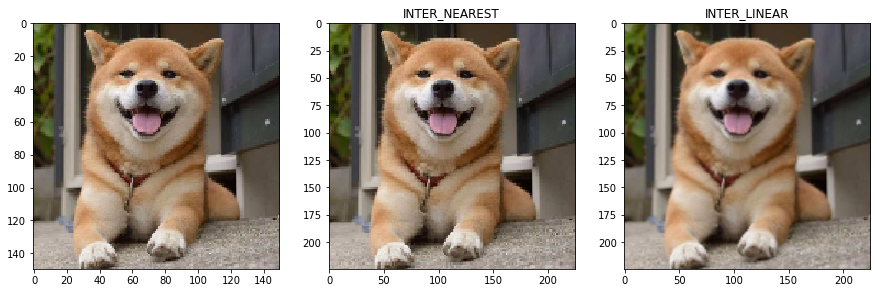

In [5]:
import cv2
import matplotlib.pyplot as plt
def show_image(img):
    plt.imshow(img[:,:,::-1])
def show_gray_image(img):
    # For showing grey image in the jupyter notebook
    plt.imshow(255-img, vmin=0, vmax=255, cmap=plt.get_cmap("Greys"))
if __name__ == "__main__":
    img = cv2.imread('640.jpg', cv2.IMREAD_UNCHANGED)
    print('Original shape : ', img.shape)#img.shape属性种第一个值对应行数，第二个值对应列数
    width = int(img.shape[1] * 0.3)#列数必须是整数
    height = int(img.shape[0] * 0.3)#行数必须是整数
    dsize = (width, height)#dsize属性值第一个数对应列数，第二个数对应行数
    # resize image
    resized = cv2.resize(img, dsize, interpolation=cv2.INTER_LINEAR)#双线性插值方式
    print('Resized shape : ', resized.shape)

    fx = 1.5#列数变为原来的1.5倍
    fy = 1.5#行数变为原来的1.5倍
    resized1 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)#最邻近插值
    resized2 = cv2.resize(resized, dsize=None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)#双线性插值
    print('Resized1 shape : ', resized1.shape)

    #显示图像
#     cv2.imshow("Resized image", resized)
#     cv2.imshow("INTER_NEAREST image", resized1)
#     cv2.imshow("INTER_LINEAR image", resized2)
    plt.figure(figsize=(15,15))
    plt.subplot(131)
    #plt.axis('off')
    show_image(resized)
    plt.subplot(132)
    #plt.axis('off')
    plt.title('INTER_NEAREST')
    show_image(resized1)
    plt.subplot(133)
    #plt.axis('off')
    plt.title('INTER_LINEAR')
    show_image(resized2)    
    #保存图像
    cv2.imwrite("Resized_image.jpg", resized)
    cv2.imwrite("INTER_NEAREST_image.jpg", resized1)
    cv2.imwrite("INTER_LINEAR_image.jpg", resized2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

最邻近插值法   
其中$x$，$y$表示输出图像像素的坐标，$x_0$,$y_0$表示输入图像像素的坐标

<div align=center><img width="30%" height="30%" src="https://img-blog.csdnimg.cn/20200412101740312.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>

&emsp;&emsp;如下图所示，将一幅3X3的图像放大到4X4，用$d(x, y)$表示目标图像，$s(x, y)$表示原图像，我们有如下公式：

$$
\begin{array}{c}
d(dst_{X}, dst_{Y}) = s(\frac{dst_{X}src_{Width}}  {dst_{Width}}, \frac{dst_{Y}src_{Height}} {dst_{Height}})
\end{array}
$$

$$
\begin{array}{c}
d(0,0)=s(0,0) \\
d(0,1)=s(0,0.75)=s(0,1) 四舍五入\\
d(0,2)=s(0,1.50)=s(0,2) \\
d(0,3)=s(0,2.25)=s(0,2) \\
...\\
\end{array}
$$

<div align=center><img width="50%" height="50%" src="https://img-blog.csdnimg.cn/20200412101854853.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zOTk0MDUxMg==,size_16,color_FFFFFF,t_70#pic_center"/></div>

**缺点：**
用该方法作放大处理时，在图象中可能出现明显的块状效应